In [1]:
from dcr_model.term_structure import TermStructure
from dcr_model.hull_white_model import HullWhiteModel
from dcr_model.interest_rate_swap import InterestRateSwap
from dcr_model.gbm_model import GeometricBrownianMotion
from dcr_model.down_in_put_option import DownInPutOption
from dcr_model.utils import *

from matplotlib import pyplot as plt

In [2]:
import numpy as np
# === TERM STRUCTURE ===
interpolation_method = 'CUBIC'
tenors = np.array([1/12, 0.5, 1, 3, 5, 10])
zero_rates = np.array([0.0025, 0.006, 0.0095, 0.015, 0.021, 0.025])
#tenors = np.array([1/12, 0.5, 1, 3, 5, 10])
#zero_rates = np.array([0.005, 0.004, 0.003, 0.02, 0.01, -0.01])
curve = TermStructure(tenors, zero_rates, r0=0, interpolate_method=interpolation_method)

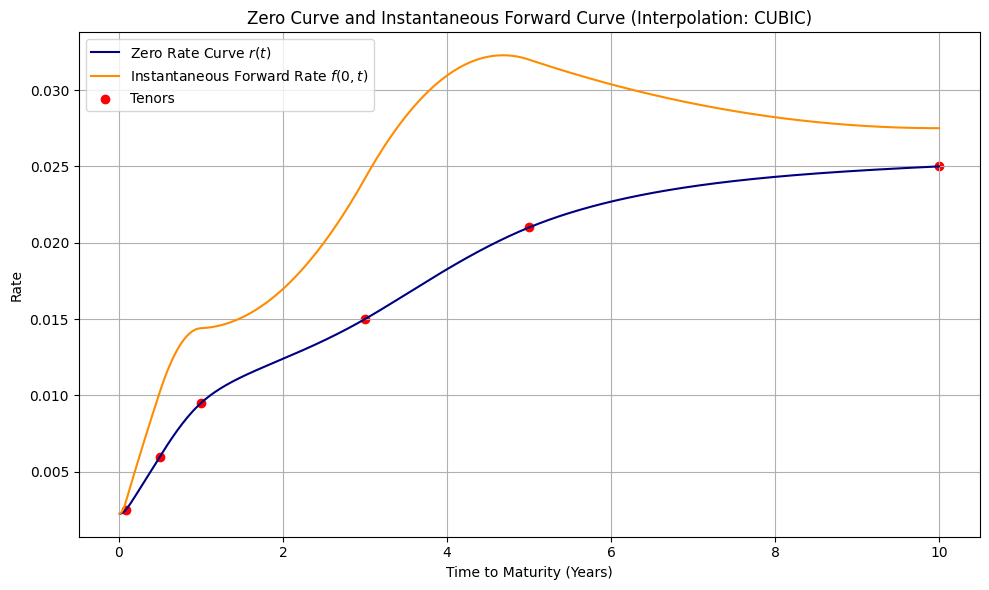

In [3]:
t_vals = np.linspace(0.01, 10, 500)
# Compute zero curve and instantaneous forward curve
zero_rates = curve.r(t_vals)
fwd_rates = curve.f0t(t_vals)
# Plot
plt.figure(figsize=(10, 6))
plt.plot(t_vals, zero_rates, label='Zero Rate Curve $r(t)$', color='navy')
plt.plot(t_vals, fwd_rates, label='Instantaneous Forward Rate $f(0,t)$', color='darkorange')
plt.scatter(tenors, curve.r(tenors), color='red', label='Tenors')
plt.xlabel('Time to Maturity (Years)')
plt.ylabel('Rate')
plt.title(f'Zero Curve and Instantaneous Forward Curve (Interpolation: {interpolation_method})')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

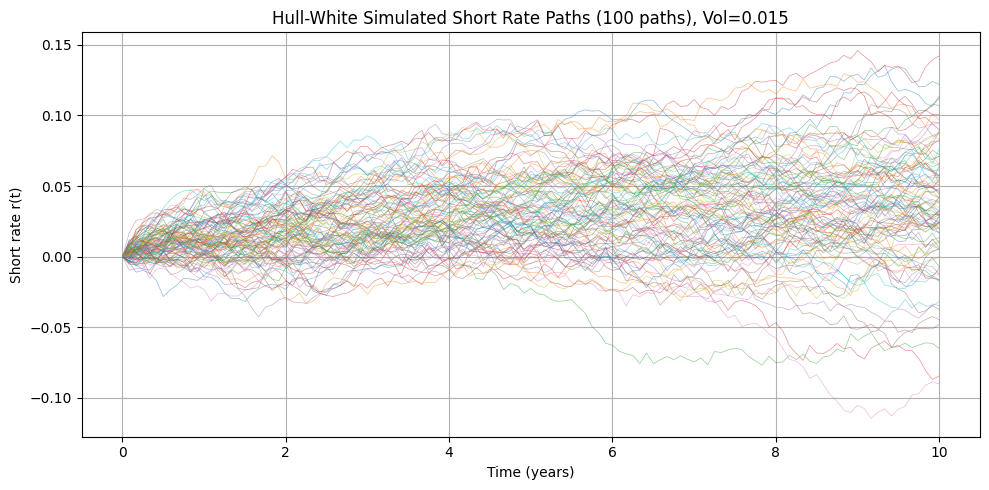

In [4]:
# === HULL-WHITE MODEL ===
# Simulate paths
n_paths = 10000
T_max = 10
a = 0.01
sigma = 0.015

hw_model = HullWhiteModel(a, sigma, curve)
r_paths, times = hw_model.simulate(n_paths=10000, T_max=10, N=120, r0=curve.r(0))

# Plot the first 100 simulated paths
plt.figure(figsize=(10, 5))
for i in range(100):
    plt.plot(times, r_paths[i], lw=0.5, alpha=0.5)

plt.title("Hull-White Simulated Short Rate Paths (100 paths), Vol=0.015")
plt.xlabel("Time (years)")
plt.ylabel("Short rate r(t)")
plt.grid(True)
plt.tight_layout()
plt.show()

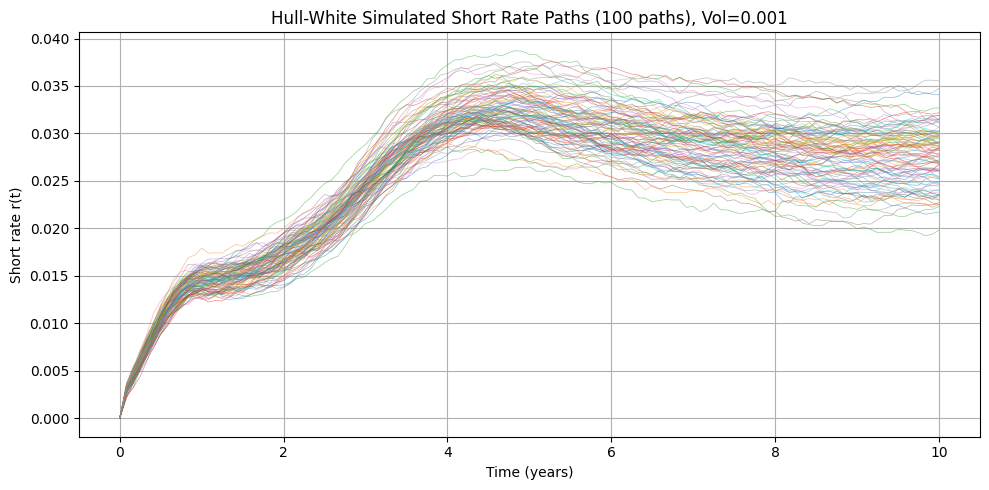

In [5]:
n_paths = 10000
T_max = 10
a = 0.01
sigma = 0.001

hw_model = HullWhiteModel(a, sigma, curve)
r_paths, times = hw_model.simulate(n_paths=10000, T_max=10, N=120, r0=curve.r(0))

# Plot the first 100 simulated paths
plt.figure(figsize=(10, 5))
for i in range(100):
    plt.plot(times, r_paths[i], lw=0.5, alpha=0.5)

plt.title("Hull-White Simulated Short Rate Paths (100 paths), Vol=0.001")
plt.xlabel("Time (years)")
plt.ylabel("Short rate r(t)")
plt.grid(True)
plt.tight_layout()
plt.show()

## Consistency Test of Hull-White Model

In [6]:
# Define sample zero curve
tenors = np.array([1/12, 0.5, 1, 3, 5, 10])
zero_rates = np.array([0.0025, 0.006, 0.0095, 0.015, 0.021, 0.025])

test_rates = np.array([
    [0.0014,	0.007, 0.0098,	0.0135,	0.0204,	0.0267],
    [0.0001,	0.0056,	0.0108,	0.0141,	0.0203,	0.0249],
    [0.004,	0.0054,	0.0091,	0.0146,	0.0232,	0.0272],
    [0.0035,	0.0064,	0.0102,	0.0165,	0.0201,	0.0262],
    [0.0012,	0.0054,	0.0104,	0.0136,	0.0209,	0.0241],
    [0.0022,	0.0032,	0.0077,	0.0143,	0.0219,	0.0248],
    [0.0025,	0.0067,	0.0086,	0.0153,	0.0202,	0.0233],
    [0.0021,	0.0066,	0.0098,	0.015,	0.0234,	0.0254],
    [0.0035,	0.0082,	0.0082,	0.014,	0.0227,	0.0242],
    [0.0025,	0.0071,	0.0104,	0.0168,	0.0225,	0.0261]
])


curve = TermStructure(tenors, zero_rates, r0=0, interpolate_method='CUBIC')
test_curves = [TermStructure(tenors, test_rates[i], r0=0, interpolate_method='CUBIC') for i in range(10)]

# Create Hull-White model
hw_model = HullWhiteModel(a=0.01, sigma=0.015, term_structure=curve)
test_models = [HullWhiteModel(a=0.01, sigma=0.015, term_structure=test_curves[i]) for i in range(10)]

# Run consistency test
T_list = [1/12, 0.5, 1.0, 3.0, 5.0, 10.0]
test_model_consistency(hw_model, T_list, n_paths=10000, N=120, numeraire = 'closed')

for i in range(10):
  print(f"\ntest model {i}")
  test_model_consistency(test_models[i], T_list, n_paths=10000, N=120, numeraire = 'closed')

T = 0.08 yr | Simulated E[DF] = 0.999792 | P(0,T) = 0.999792 | Abs Error = 3.330669e-16
T = 0.50 yr | Simulated E[DF] = 0.997004 | P(0,T) = 0.997004 | Abs Error = 4.440892e-16
T = 1.00 yr | Simulated E[DF] = 0.990545 | P(0,T) = 0.990545 | Abs Error = 0.000000e+00
T = 3.00 yr | Simulated E[DF] = 0.955997 | P(0,T) = 0.955997 | Abs Error = 3.330669e-16
T = 5.00 yr | Simulated E[DF] = 0.900325 | P(0,T) = 0.900325 | Abs Error = 1.110223e-16
T = 10.00 yr | Simulated E[DF] = 0.778801 | P(0,T) = 0.778801 | Abs Error = 1.110223e-16

test model 0
T = 0.08 yr | Simulated E[DF] = 0.999883 | P(0,T) = 0.999883 | Abs Error = 2.220446e-16
T = 0.50 yr | Simulated E[DF] = 0.996506 | P(0,T) = 0.996506 | Abs Error = 1.110223e-16
T = 1.00 yr | Simulated E[DF] = 0.990248 | P(0,T) = 0.990248 | Abs Error = 1.110223e-16
T = 3.00 yr | Simulated E[DF] = 0.960309 | P(0,T) = 0.960309 | Abs Error = 1.110223e-16
T = 5.00 yr | Simulated E[DF] = 0.903030 | P(0,T) = 0.903030 | Abs Error = 3.330669e-16
T = 10.00 yr | Si

## Single-Curve Framework pricing of IRS

In [7]:
irs = InterestRateSwap(fixed_rate=0.02488, maturity=10, freq=2)
irs.price(curve)

0.0010039139731644886

## MtM (IRS)

In [8]:
mtm_matrix, times = irs.simulate_mtm_paths(HullWhiteModel(0.01, 0.015, curve), n_paths=10000, dt_sim=1/12)

100%|████████████████████████████████████████| 121/121 [00:00<00:00, 358.12it/s]


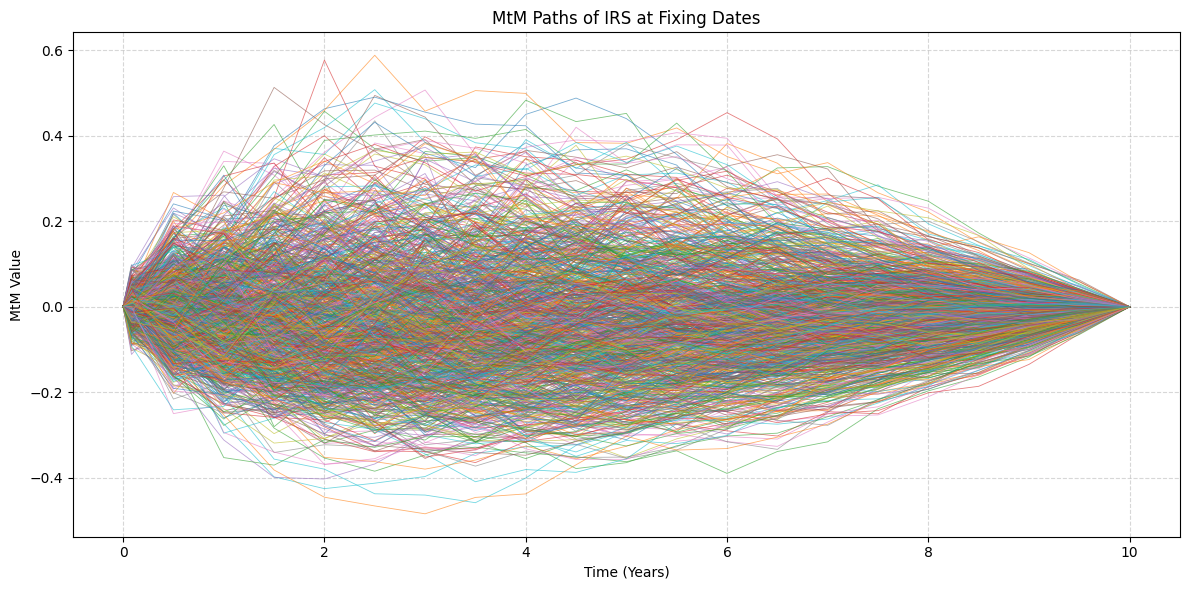

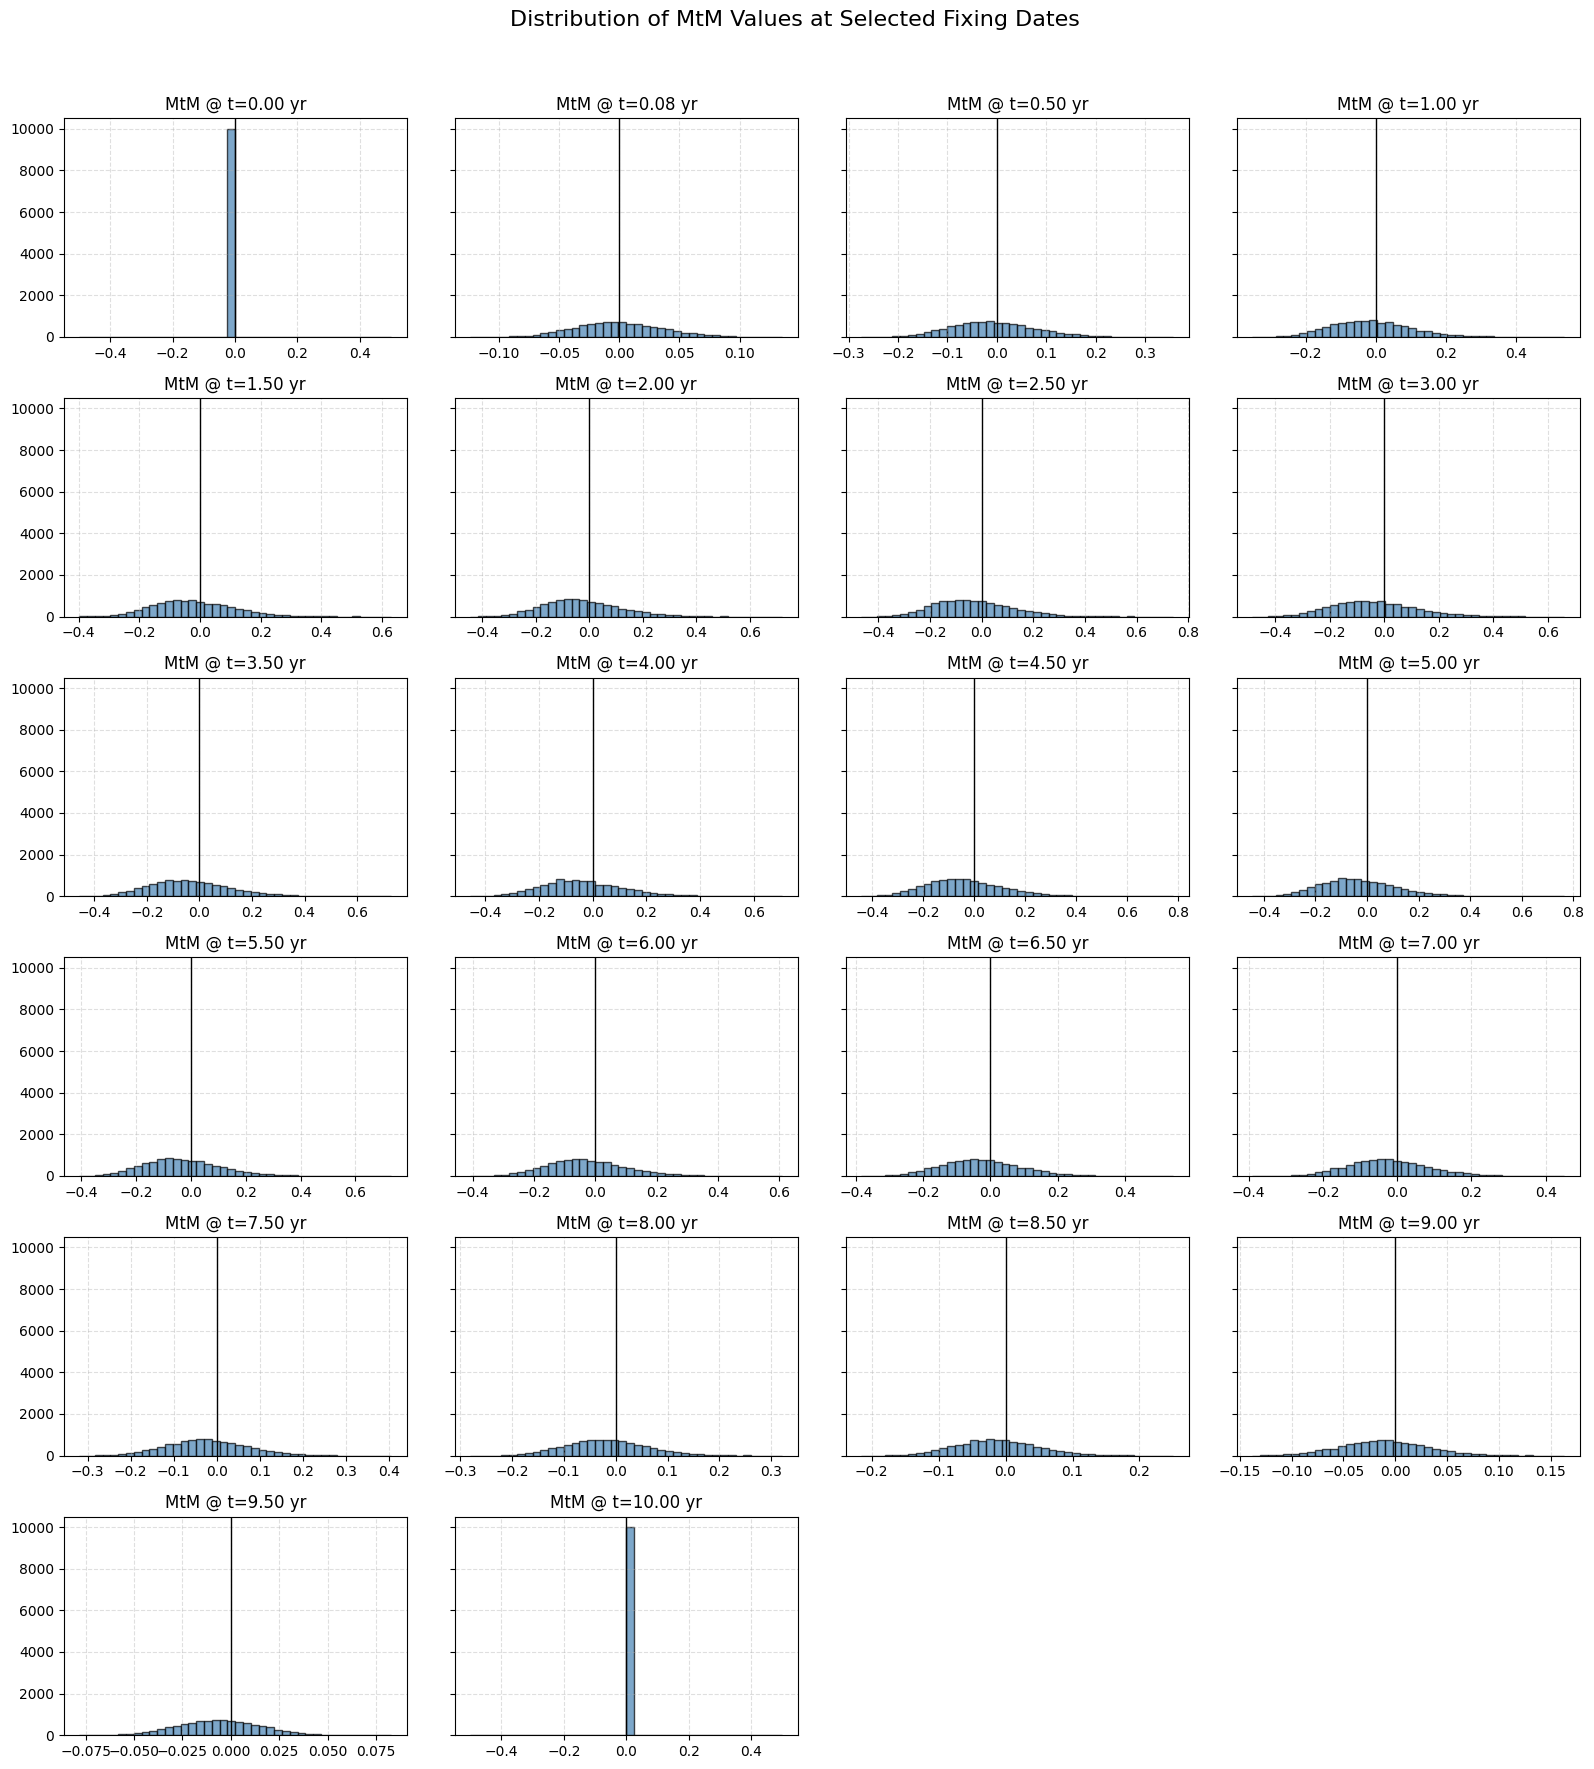

In [9]:
from dcr_model.utils import *
fixing_dates = [0, 1/12] + list(np.arange(0.5, 10.5, 0.5))
#fixing_dates = np.linspace(0, 10, 3601)
plot_mtm_paths_and_histograms(mtm_matrix, times, fixing_dates)

## EE & PFE (IRS-Uncollateralized)

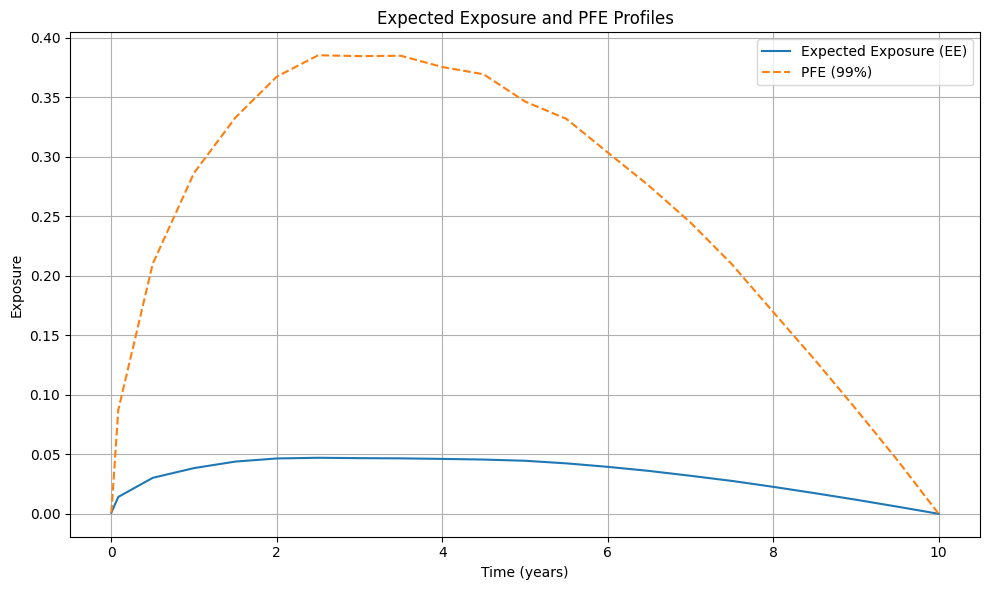

In [11]:
ee, pfe = irs.compute_EE_PFE(mtm_matrix, times, fixing_dates)

# Plot EE and PFE
plt.figure(figsize=(10, 6))
plt.plot(fixing_dates, ee, label='Expected Exposure (EE)')
plt.plot(fixing_dates, pfe, '--', label='PFE (99%)')
plt.xlabel("Time (years)")
plt.ylabel("Exposure")
plt.title("Expected Exposure and PFE Profiles")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## CVA & FVA (IRS - Uncollateralized)

In [12]:
cva = irs.compute_cva(
    fixing_dates=fixing_dates,
    ee=ee,
    term_structure=curve,
    cds_spreads_bps=[53, 98, 122, 132, 138, 142, 144, 145, 146, 147],
    cds_tenors=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    lgd=0.4
)

shifted_spreads = [s + 100 for s in [53, 98, 122, 132, 138, 142, 144, 145, 146, 147]]
cva_shifted = irs.compute_cva(
    fixing_dates=fixing_dates,
    ee=ee,
    term_structure=curve,
    cds_spreads_bps=shifted_spreads,
    cds_tenors=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    lgd=0.4
)

print(f"CVA (original spreads): {cva:.6f}")
print(f"CVA (shifted +100bps): {cva_shifted:.6f}")
print(f"Sensitivity to +100bps CDS shift: {cva_shifted - cva:.6f}")

CVA (original spreads): 0.003329
CVA (shifted +100bps): 0.005531
Sensitivity to +100bps CDS shift: 0.002201


In [13]:
fva = irs.compute_fva(fixing_dates, ee, curve, funding_spread_bps=40)
print(f"FVA (0.4% spread) = {fva:.6f}")

FVA (0.4% spread) = 0.001226


## EE & PFE (IRS - Collateralized)

100%|██████████████████████████████████████| 3601/3601 [00:12<00:00, 278.08it/s]


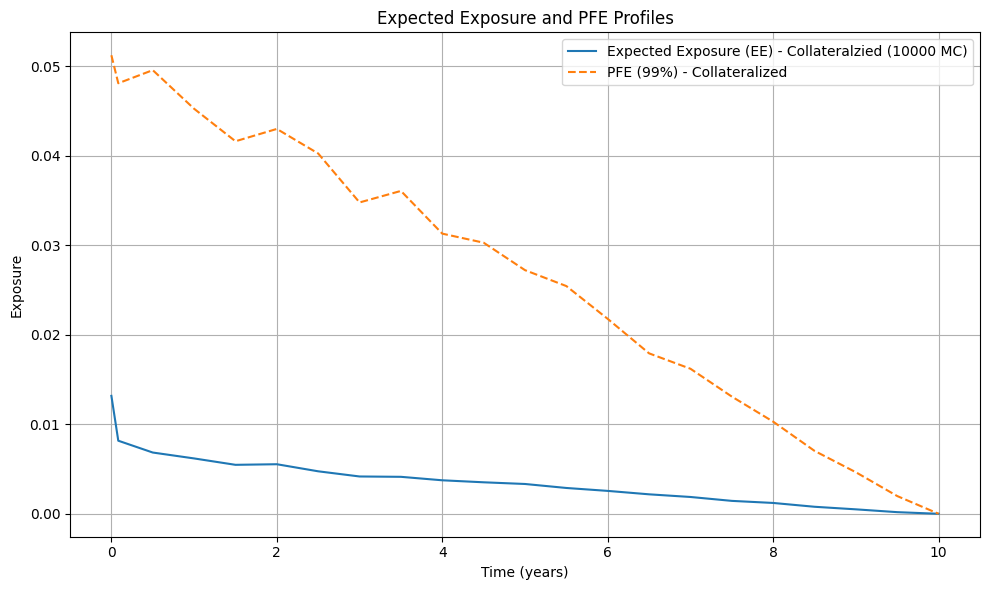

In [14]:
# Plot EE and PFE
fixing_dates  = [0, 1/12] + list(np.arange(0.5, 10.5, 0.5))
ee_collateralized, pfe_collateralized = irs.compute_EE_PFE_collateralized(HullWhiteModel(0.01, 0.015, curve), 
                                                                          fixing_dates,
                                                                          n_paths = 10000,
                                                                          mpor_days=10)
plt.figure(figsize=(10, 6))
plt.plot(fixing_dates, ee_collateralized, label='Expected Exposure (EE) - Collateralzied (10000 MC)')
plt.plot(fixing_dates, pfe_collateralized, '--', label='PFE (99%) - Collateralized')
plt.xlabel("Time (years)")
plt.ylabel("Exposure")
plt.title("Expected Exposure and PFE Profiles")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

100%|███████████████████████████████████████████| 22/22 [01:22<00:00,  3.73s/it]


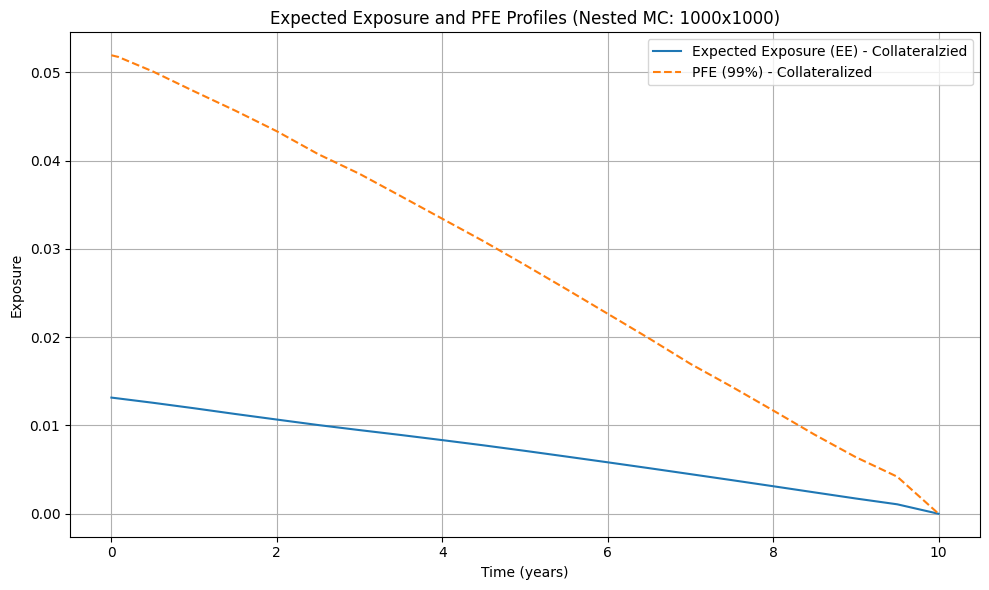

In [15]:
# Plot EE and PFE
fixing_dates  = [0, 1/12] + list(np.arange(0.5, 10.5, 0.5))
ee_collateralized, pfe_collateralized = irs.compute_EE_PFE_collateralized_nested(HullWhiteModel(0.01, 0.015, curve), 
                                                                                 fixing_dates, 
                                                                                 mpor_days=10)
plt.figure(figsize=(10, 6))
plt.plot(fixing_dates, ee_collateralized, label='Expected Exposure (EE) - Collateralzied')
plt.plot(fixing_dates, pfe_collateralized, '--', label='PFE (99%) - Collateralized')
plt.xlabel("Time (years)")
plt.ylabel("Exposure")
plt.title("Expected Exposure and PFE Profiles (Nested MC: 1000x1000)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## CVA & FVA (IRS - Collateralized)

In [16]:
cva_collateralized = irs.compute_cva(
    fixing_dates=fixing_dates,
    ee=ee_collateralized,
    term_structure=curve,
    cds_spreads_bps=[53, 98, 122, 132, 138, 142, 144, 145, 146, 147],
    cds_tenors=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    lgd=0.4
)
fva_collateralized = irs.compute_fva(fixing_dates, ee_collateralized, curve, funding_spread_bps=40)

print(f"CVA collateralized: {cva_collateralized:.6f}")
print(f"FVA collateralized: {fva_collateralized:.6f}")

CVA collateralized: 0.000629
FVA collateralized: 0.000247


## Hull-White GBM (corr=-0.3)

In [17]:
gbm = GeometricBrownianMotion(S0=100, rate_model=HullWhiteModel(a=0.01, sigma=0.015, term_structure=curve), sigma=0.30, rho=-0.3)
S_paths, r_paths, times = gbm.simulate(n_paths=10000, T_max=1.5, N=360)

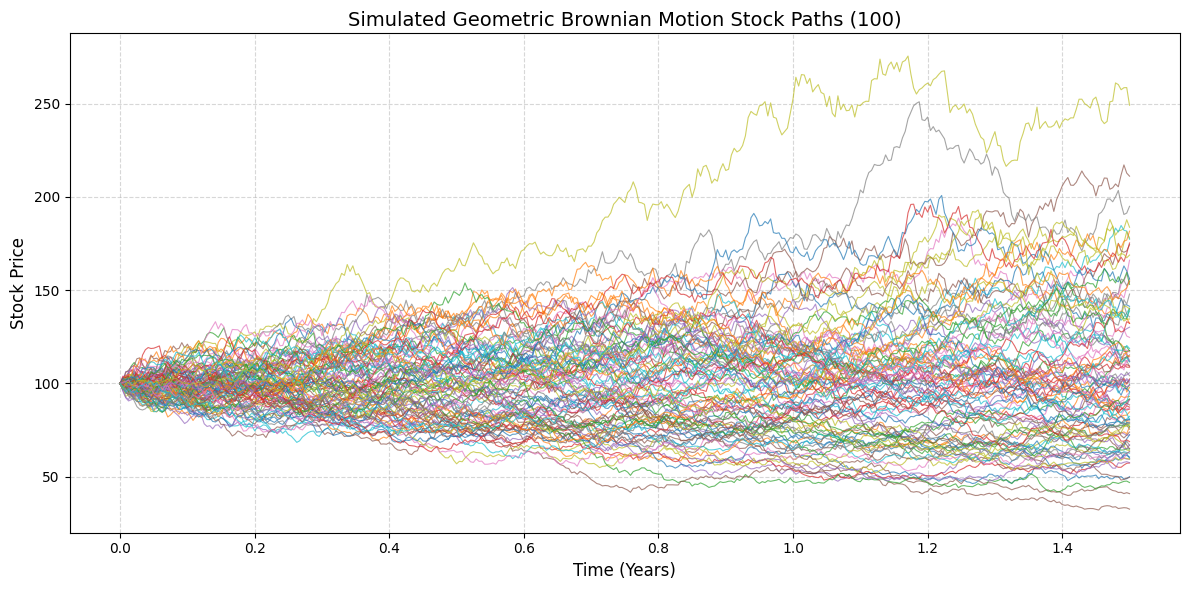

In [18]:
plot_gbm_paths(S_paths, times)

Simulating Outer Price Paths...
Iterating over times...


100%|█████████████████████████████████████████| 108/108 [00:27<00:00,  3.88it/s]


0.019641205139324026
Simulating Outer Price Paths...
Iterating over times...


100%|█████████████████████████████████████████| 108/108 [00:29<00:00,  3.61it/s]


0.029695991138891327
Simulating Outer Price Paths...
Iterating over times...


100%|█████████████████████████████████████████| 108/108 [00:28<00:00,  3.82it/s]


0.044080935768263975
Simulating Outer Price Paths...
Iterating over times...


100%|█████████████████████████████████████████| 108/108 [00:28<00:00,  3.74it/s]


0.05437753723089822
Simulating Outer Price Paths...
Iterating over times...


100%|█████████████████████████████████████████| 108/108 [00:28<00:00,  3.75it/s]


0.06453107001923553
Simulating Outer Price Paths...
Iterating over times...


100%|█████████████████████████████████████████| 108/108 [00:29<00:00,  3.66it/s]


0.07269450905772522
Simulating Outer Price Paths...
Iterating over times...


100%|█████████████████████████████████████████| 108/108 [00:28<00:00,  3.82it/s]


0.07777464304928156
Barrier = 50 | FVA = 0.019641
Barrier = 55 | FVA = 0.029696
Barrier = 60 | FVA = 0.044081
Barrier = 65 | FVA = 0.054378
Barrier = 70 | FVA = 0.064531
Barrier = 75 | FVA = 0.072695
Barrier = 80 | FVA = 0.077775


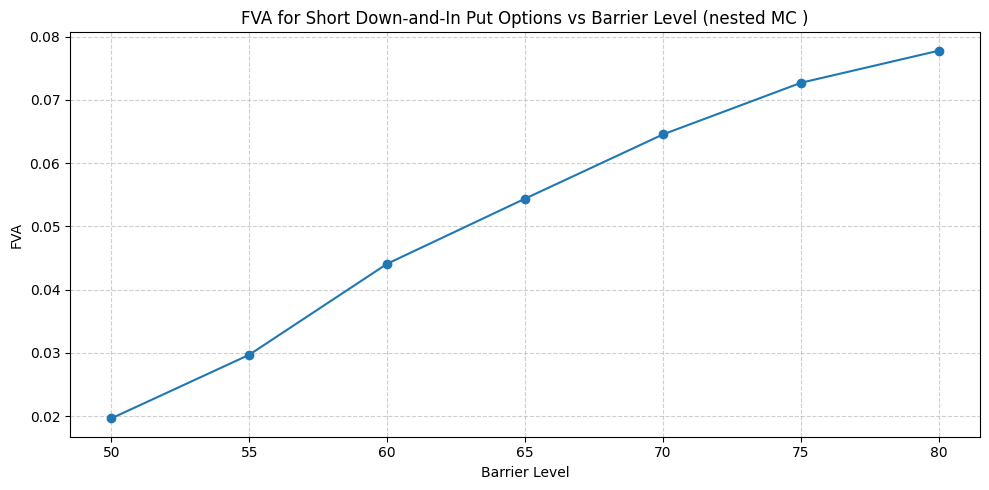

In [19]:
from tqdm import tqdm
strike = 100
maturity = 1.5
barrier_levels = [50, 55, 60, 65, 70, 75, 80]
sF = 0.004  # 40 bps

# Step 5: FVA computation
fva_results = {}

N_outer = 1000
N_inner = 100
for barrier in barrier_levels:
    option = DownInPutOption(strike=strike, barrier=barrier, maturity=maturity, position=-1)
    fva = option.fva(gbm, sF=sF, n_paths=N_outer, T_max=1.5, N_nested=N_inner, outer_dt=1/72, inner_dt=1/72)
    fva_results[barrier] = fva

# Step 6: Display results
for barrier, fva in fva_results.items():
    print(f"Barrier = {barrier} | FVA = {fva:.6f}")

# Step 7: Plotting
plt.figure(figsize=(10, 5))
plt.plot(list(fva_results.keys()), list(fva_results.values()), marker='o')
plt.title("FVA for Short Down-and-In Put Options vs Barrier Level (nested MC )")
plt.xlabel("Barrier Level")
plt.ylabel("FVA")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

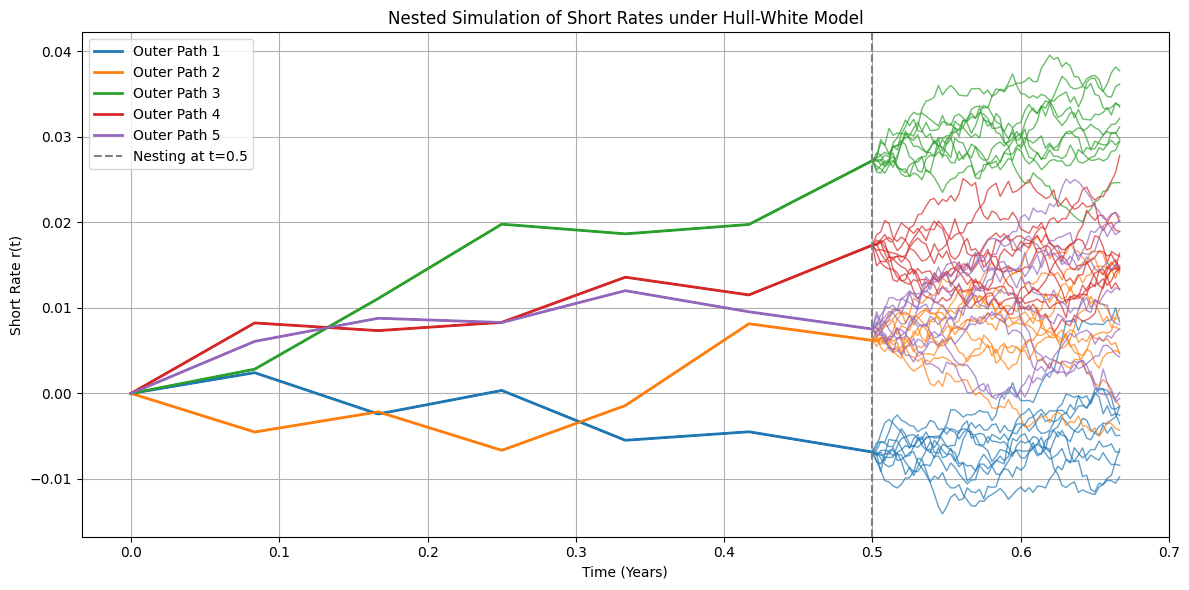

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# --- Parameters ---
a = 0.01
sigma = 0.015
r0 = 0
T_max = 5.0
dt_outer = 1 / 12
N_outer_paths = 5
N_outer_steps = int(T_max / dt_outer)

dt_inner = 1 / 360
N_inner_steps = 60  # simulate 60 days into the future
N_inner_paths = 10
t_nest = 0.5  # time at which nesting begins



# --- Model initialization ---
hw = HullWhiteModel(a, sigma, curve)

# --- Outer simulation ---
outer_paths, outer_times = hw.simulate(N_outer_paths, T_max, N_outer_steps, r0)

# --- Nested simulation ---
nested_paths, nested_times = hw.simulate_nested(
    r_paths=outer_paths,
    times=outer_times,
    t=t_nest,
    dt=dt_inner,
    n_steps=N_inner_steps,
    N_inner=N_inner_paths
)

# --- Plotting ---
plt.figure(figsize=(12, 6))

# Plot outer paths up to t_nest
t_idx = np.searchsorted(outer_times, t_nest)
for i in range(N_outer_paths):
    plt.plot(outer_times[:t_idx + 1], outer_paths[i, :t_idx + 1], lw=2, label=f'Outer Path {i+1}')

# Plot nested paths
offset = N_inner_paths
for i in range(N_outer_paths):
    for j in range(N_inner_paths):
        path_idx = i * N_inner_paths + j
        plt.plot(nested_times, nested_paths[path_idx], lw=1, alpha=0.7, color=f"C{i}")

plt.axvline(t_nest, color='gray', linestyle='--', label=f'Nesting at t={t_nest}')
plt.title("Nested Simulation of Short Rates under Hull-White Model")
plt.xlabel("Time (Years)")
plt.ylabel("Short Rate r(t)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

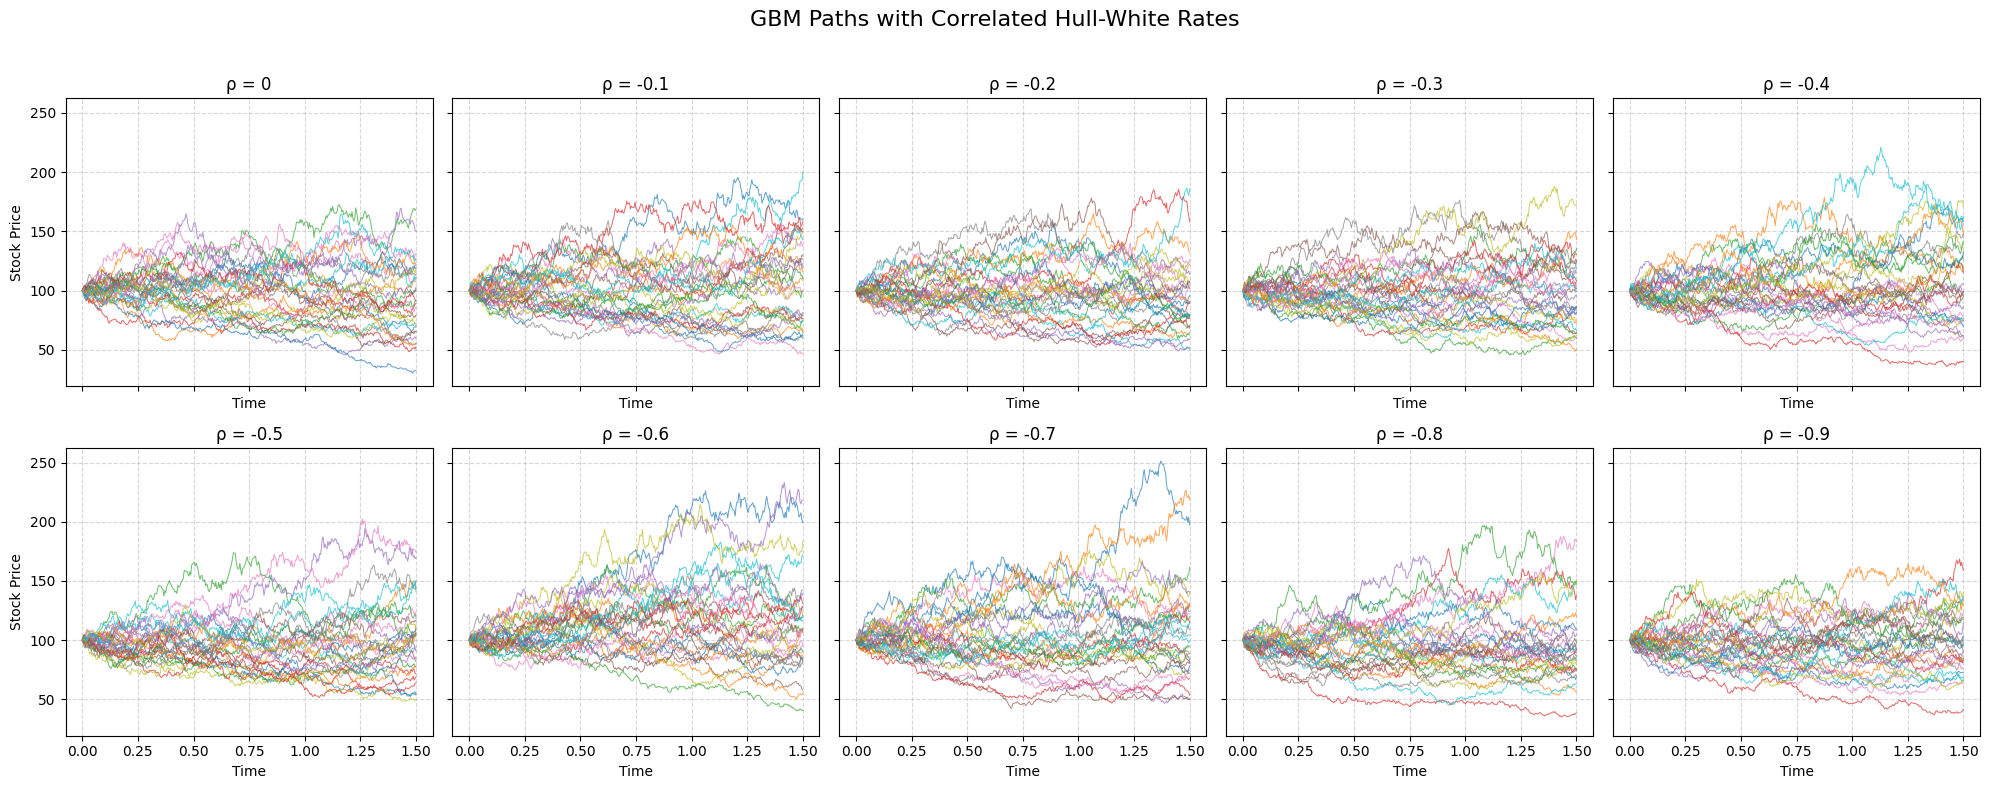

In [21]:
# Define the term structure and Hull-White model
zero_tenors = [1 / 12, 0.5, 1, 3, 5, 10]
zero_rates = [0.0025, 0.006, 0.0095, 0.015, 0.021, 0.025]
curve = TermStructure(zero_tenors, zero_rates)
hw_model = HullWhiteModel(a=0.01, sigma=0.015, term_structure=curve)

# Simulation settings
S0 = 100
sigma = 0.30
n_paths = 100
T_max = 1.5
N = 360
rhos = [0, -0.1, -0.2, -0.3, -0.4, -0.5, -0.6, -0.7, -0.8, -0.9]

# Plotting
fig, axes = plt.subplots(2, 5, figsize=(20, 8), sharex=True, sharey=True)
axes = axes.flatten()

for i, rho in enumerate(rhos):
    gbm = GeometricBrownianMotion(S0=S0, rate_model=hw_model, sigma=sigma)
    S_paths, _, times = gbm.simulate(n_paths=n_paths, T_max=T_max, N=N)

    for path in S_paths[:30]:  # plot first 30 paths
        axes[i].plot(times, path, lw=0.7, alpha=0.7)
    
    axes[i].set_title(f"ρ = {rho}")
    axes[i].grid(True, linestyle='--', alpha=0.5)
    axes[i].set_xlabel("Time")
    if i % 5 == 0:
        axes[i].set_ylabel("Stock Price")

fig.suptitle("GBM Paths with Correlated Hull-White Rates", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [22]:
def plot_nested_gbm_paths(S_paths_nested, times_nested, N_outer, t_split=None, max_outer_paths=5, max_inner_paths=10):
    """
    Plot nested GBM paths from t=0 to T_max.
    
    Parameters:
    - S_paths_nested: np.ndarray, shape (N_outer * N_inner, len(times_nested))
    - times_nested: np.ndarray of shape (len_times,)
    - t_split: float, optional branching time (draw vertical line)
    - max_outer_p
    aths: number of outer paths to show
    - max_inner_paths: number of inner paths to show per outer path
    """
    n_total_paths = S_paths_nested.shape[0]
    n_time_steps = S_paths_nested.shape[1]

    # Infer N_inner and N_outer
    # Try to guess reasonable grid if user didn’t specify explicitly

    plt.figure(figsize=(12, 6))
    
    for i in range(max_outer_paths):
        for j in range(max_inner_paths):
            idx = i * S_paths_nested.shape[0]//N_outer + j
            if idx < n_total_paths:
                plt.plot(times_nested, S_paths_nested[idx], lw=0.8)

    if t_split is not None:
        plt.axvline(x=t_split, color='black', linestyle='--', lw=1.2, label=f"Split at t={t_split:.2f}")

    plt.title("Nested GBM Simulation Paths")
    plt.xlabel("Time")
    plt.ylabel("Stock Price")
    plt.grid(True, linestyle='--', alpha=0.5)
    if t_split is not None:
        plt.legend()
    plt.tight_layout()
    plt.show()

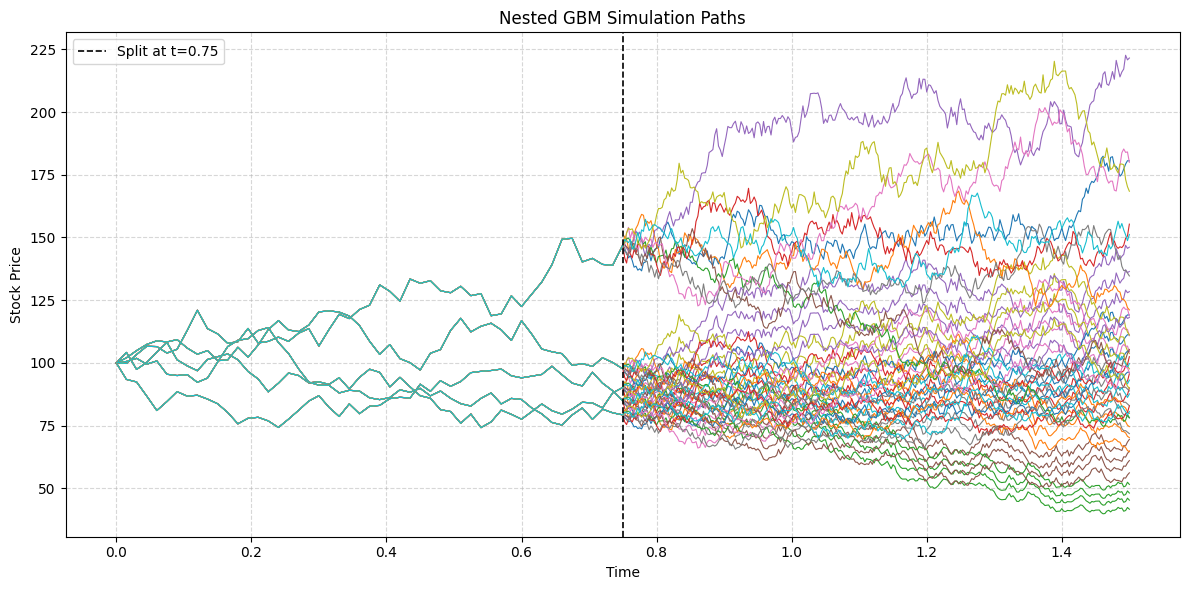

In [23]:
#gbm = GeometricBrownianMotion(S0=100, rate_model=HullWhiteModel(a=0.01, sigma=0.015, term_structure=curve), sigma=0.30, rho=0)
S_paths_outer, r_paths_outer, times_outer = gbm.simulate(n_paths=5, T_max=1.5, N=100)
S_paths_nested, r_paths_nested, times_nested = gbm.simulate_nested(S_paths_outer, r_paths_outer, times_outer,
                                                                   t=0.75, T_max=1.5, dt=1/360, N_inner=10)
plot_nested_gbm_paths(S_paths_nested, times_nested, 5, t_split=0.75)